## CA Wildfire Data Cleaning and EDA

### Import Libraries

In [93]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Read in CSV File

In [79]:
df = pd.read_csv('data.csv')

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/1507164070.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [80]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [81]:
df.shape

(2303566, 39)

In [82]:
df.isnull().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

### Drop Unnecessary Columns

In [84]:
# columns to be dropped due to missing data or unnecessary content 
columns_to_drop = ['Shape', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'SOURCE_REPORTING_UNIT_NAME', 'NWCG_REPORTING_UNIT_ID', 'SOURCE_REPORTING_UNIT', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'COMPLEX_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIPS_CODE', 'COUNTY', 'OWNER_DESCR']

In [85]:
# drop columns
df = df.drop(columns=columns_to_drop, axis=1)

### Narrow Down Dataset to CA Fires Only 

In [86]:
# Filtering for only fires from CA
df = df.loc[df['STATE'] == 'CA']

### Rename Columns for Better Readability

In [87]:
# Renaming columns for better readability
df.rename(columns={
    'OBJECTID': 'Object_ID',
    'FOD_ID': 'Fire_Occurrence_ID',
    'FPA_ID': 'Fire_Protection_Agency_ID',
    'NWCG_REPORTING_AGENCY': 'Reporting_Agency',
    'NWCG_REPORTING_UNIT_NAME': 'Reporting_Unit_Name',
    'FIRE_YEAR': 'Fire_Year',
    'DISCOVERY_DATE': 'Discovery_Date',
    'DISCOVERY_DOY': 'Discovery_Day_of_Year',
    'DISCOVERY_TIME': 'Discovery_Time',
    'NWCG_CAUSE_CLASSIFICATION': 'Cause_Classification',
    'NWCG_GENERAL_CAUSE': 'General_Cause',
    'FIRE_SIZE': 'Fire_Size_Acres',
    'FIRE_SIZE_CLASS': 'Fire_Size_Class',
    'FIRE_NAME': 'Fire_Name',
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'STATE': 'State',
    'FIPS_NAME': 'FIPS_Name',
}, inplace=True)

In [88]:
df.head()

,Object_ID,Fire_Occurrence_ID,Fire_Protection_Agency_ID,Reporting_Agency,Reporting_Unit_Name,Fire_Name,Fire_Year,Discovery_Date,Discovery_Day_of_Year,Discovery_Time,Cause_Classification,General_Cause,Fire_Size_Acres,Fire_Size_Class,Latitude,Longitude,State,FIPS_Name
0,1,1,FS-1418826,FS,Plumas National Forest,FOUNTAIN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,CA,Plumas County
1,2,2,FS-1418827,FS,Eldorado National Forest,PIGEON,2004,5/12/2004,133,845.0,Natural,Natural,0.25,A,38.933056,-120.404444,CA,Placer County
2,3,3,FS-1418835,FS,Eldorado National Forest,SLACK,2004,5/31/2004,152,1921.0,Human,Debris and open burning,0.10,A,38.984167,-120.735556,CA,El Dorado County
3,4,4,FS-1418845,FS,Eldorado National Forest,DEER,2004,6/28/2004,180,1600.0,Natural,Natural,0.10,A,38.559167,-119.913333,CA,Alpine County
4,5,5,FS-1418847,FS,Eldorado National Forest,STEVENOT,2004,6/28/2004,180,1600.0,Natural,Natural,0.10,A,38.559167,-119.933056,CA,Alpine County


### Change Date Format and Add Column for Future Analysis 

In [89]:
df['Discovery_Date'].head()

0     2/2/2005
1    5/12/2004
2    5/31/2004
3    6/28/2004
4    6/28/2004
Name: Discovery_Date, dtype: object

In [90]:
df['Discovery_Date'] = pd.to_datetime(df['Discovery_Date'])

In [91]:
df['Week_Before_Discovery_Date'] = df['Discovery_Date'] - timedelta(days=7)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251881 entries, 0 to 2303562
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Object_ID                   251881 non-null  int64         
 1   Fire_Occurrence_ID          251881 non-null  int64         
 2   Fire_Protection_Agency_ID   251881 non-null  object        
 3   Reporting_Agency            251881 non-null  object        
 4   Reporting_Unit_Name         251881 non-null  object        
 5   Fire_Name                   204512 non-null  object        
 6   Fire_Year                   251881 non-null  int64         
 7   Discovery_Date              251881 non-null  datetime64[ns]
 8   Discovery_Day_of_Year       251881 non-null  int64         
 9   Discovery_Time              206816 non-null  float64       
 10  Cause_Classification        251881 non-null  object        
 11  General_Cause               251881 non-null

### EDA and Key Visualizations of Wildfire Dataset

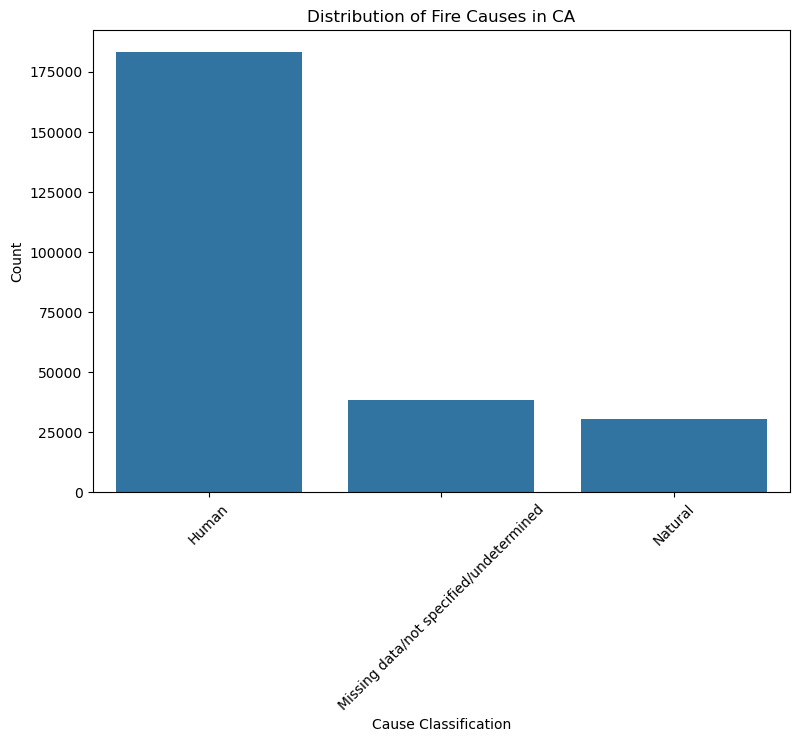

In [95]:
# Cause Classification distribution
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Cause_Classification', order=df['Cause_Classification'].value_counts().index)
plt.title('Distribution of Fire Causes in CA')
plt.xlabel('Cause Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3882237456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='General_Cause', order=df['General_Cause'].value_counts().index, palette='Set2')


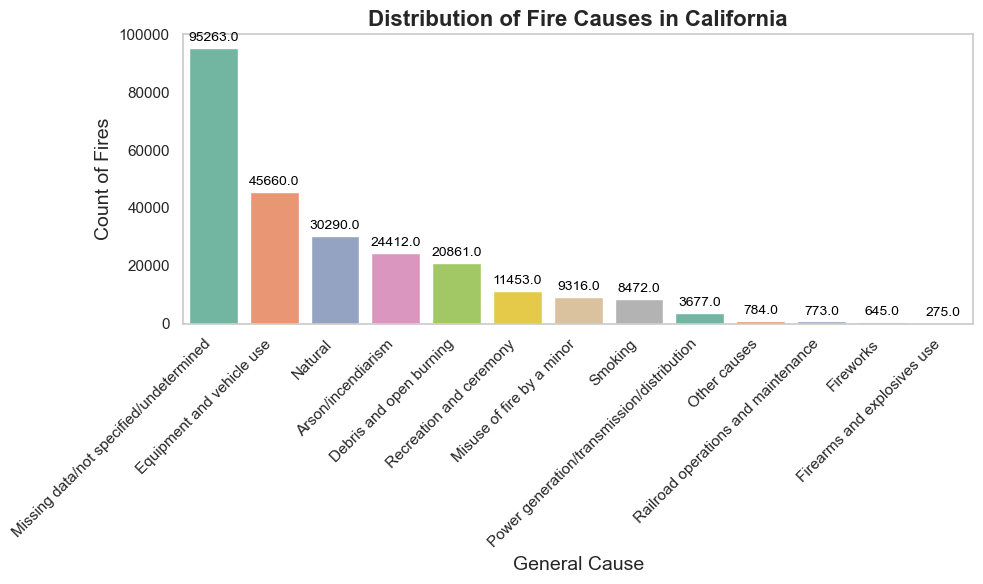

In [99]:
# Specific Fire Cause distribution

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='General_Cause', order=df['General_Cause'].value_counts().index, palette='Set2')

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')


plt.title('Distribution of Fire Causes in California', fontsize=16, fontweight='bold')
plt.xlabel('Specific Cause', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

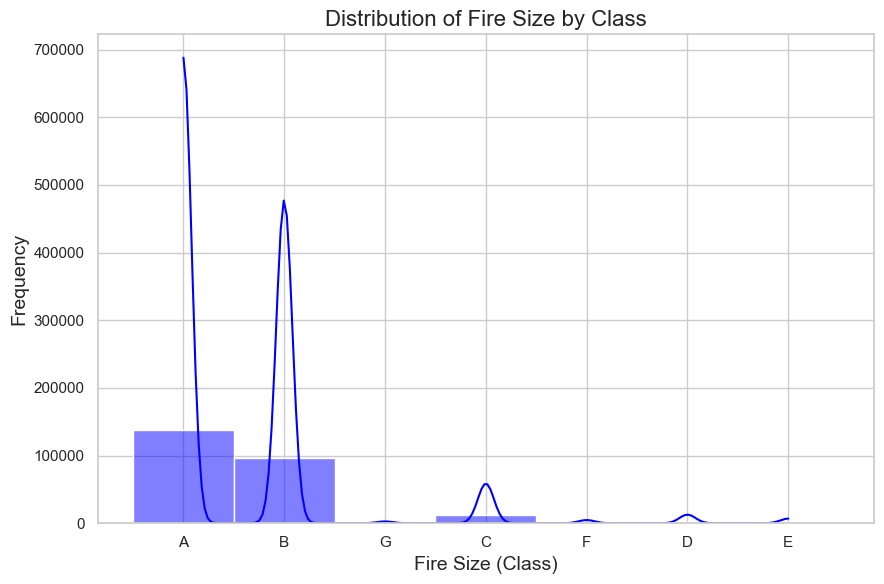

In [104]:
# Fire Size Distribution by Class
plt.figure(figsize=(9, 6))
sns.histplot(df['Fire_Size_Class'], bins=30, kde=True, color='blue')
plt.title('Distribution of Fire Size by Class', fontsize=16)
plt.xlabel('Fire Size (Class)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/540550002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fire_Size_Class', order=df['Fire_Size_Class'].value_counts().index, palette='Paired')


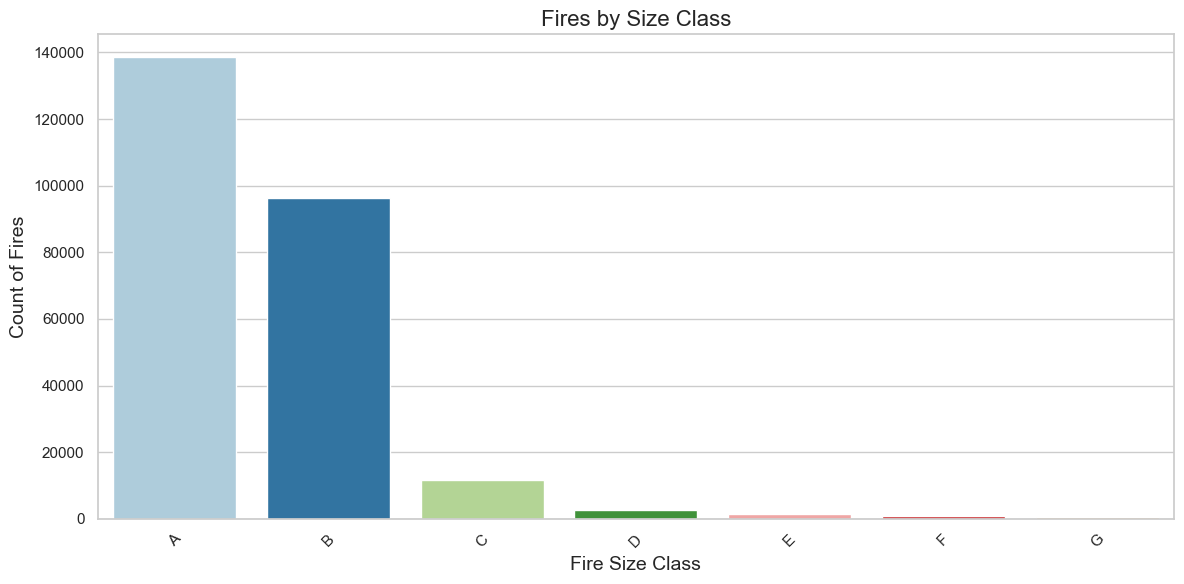

In [117]:
# Fire Size by Class (just diff type of graph)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fire_Size_Class', order=df['Fire_Size_Class'].value_counts().index, palette='Paired')
plt.title('Fires by Size Class', fontsize=16)
plt.xlabel('Fire Size Class', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

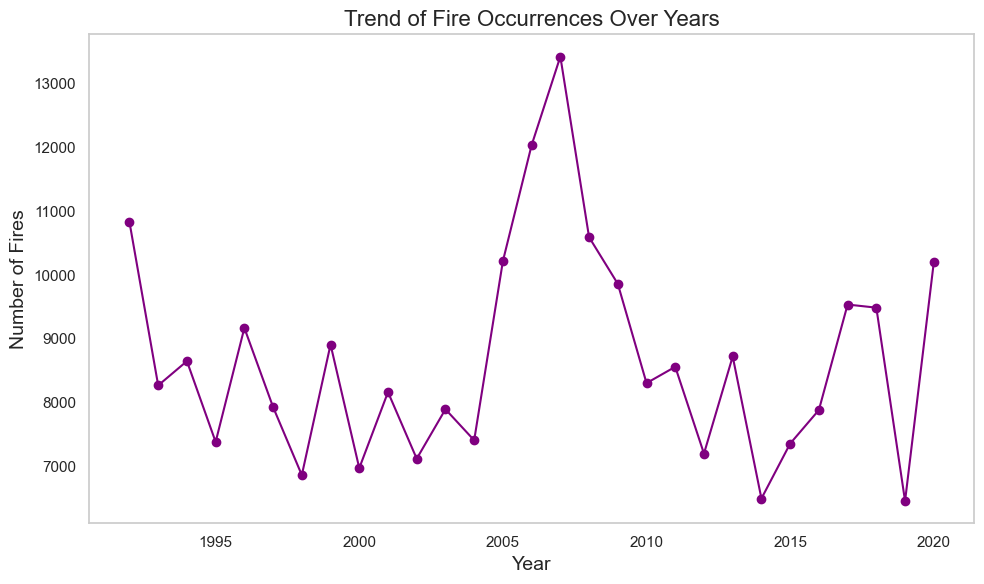

In [105]:
# Fire Occurences Over Years
plt.figure(figsize=(10, 6))
df.groupby('Fire_Year').size().plot(kind='line', marker='o', color='purple')
plt.title('Trend of Fire Occurrences Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3473182892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='General_Cause', y='Fire_Size_Acres', palette='Set1')


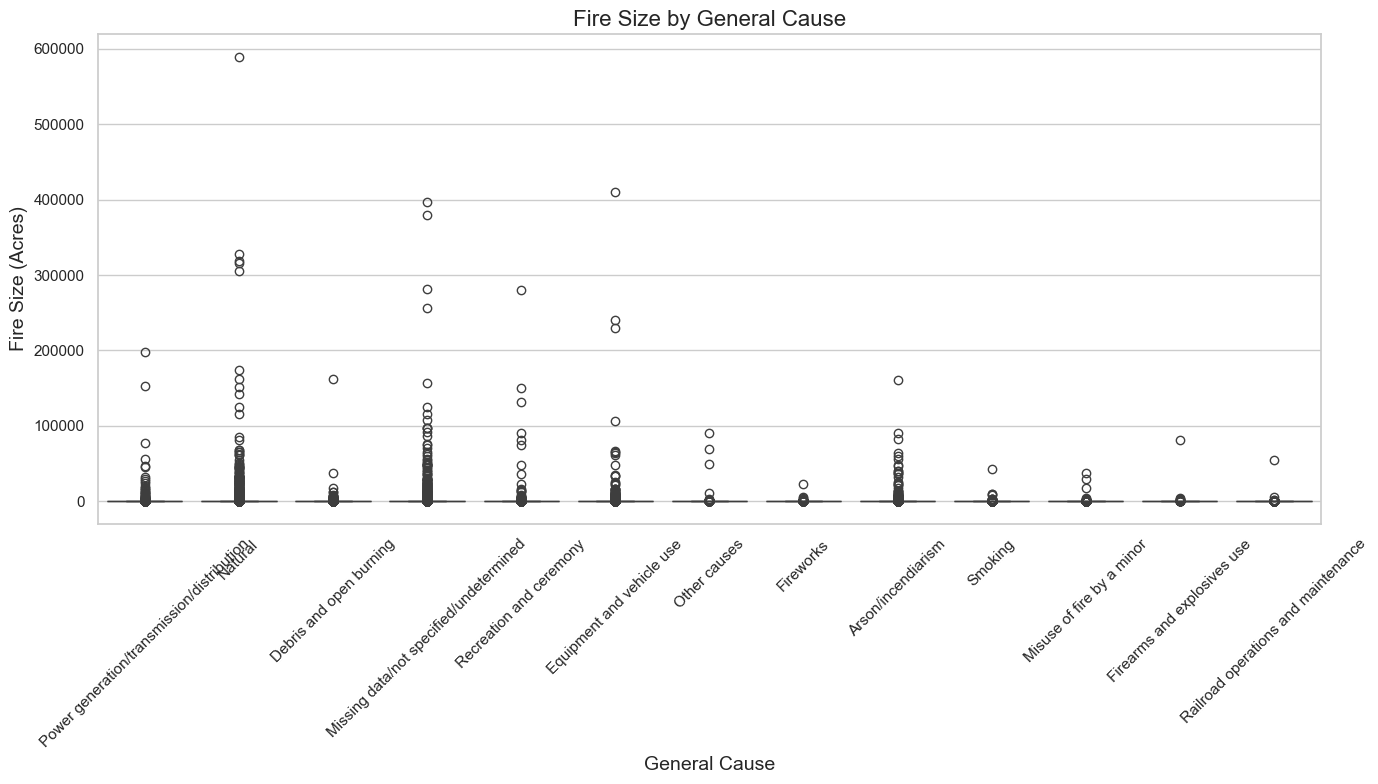

In [106]:
# Fire Size by Cause
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='General_Cause', y='Fire_Size_Acres', palette='Set1')
plt.title('Fire Size by General Cause', fontsize=16)
plt.xlabel('General Cause', fontsize=14)
plt.ylabel('Fire Size (Acres)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

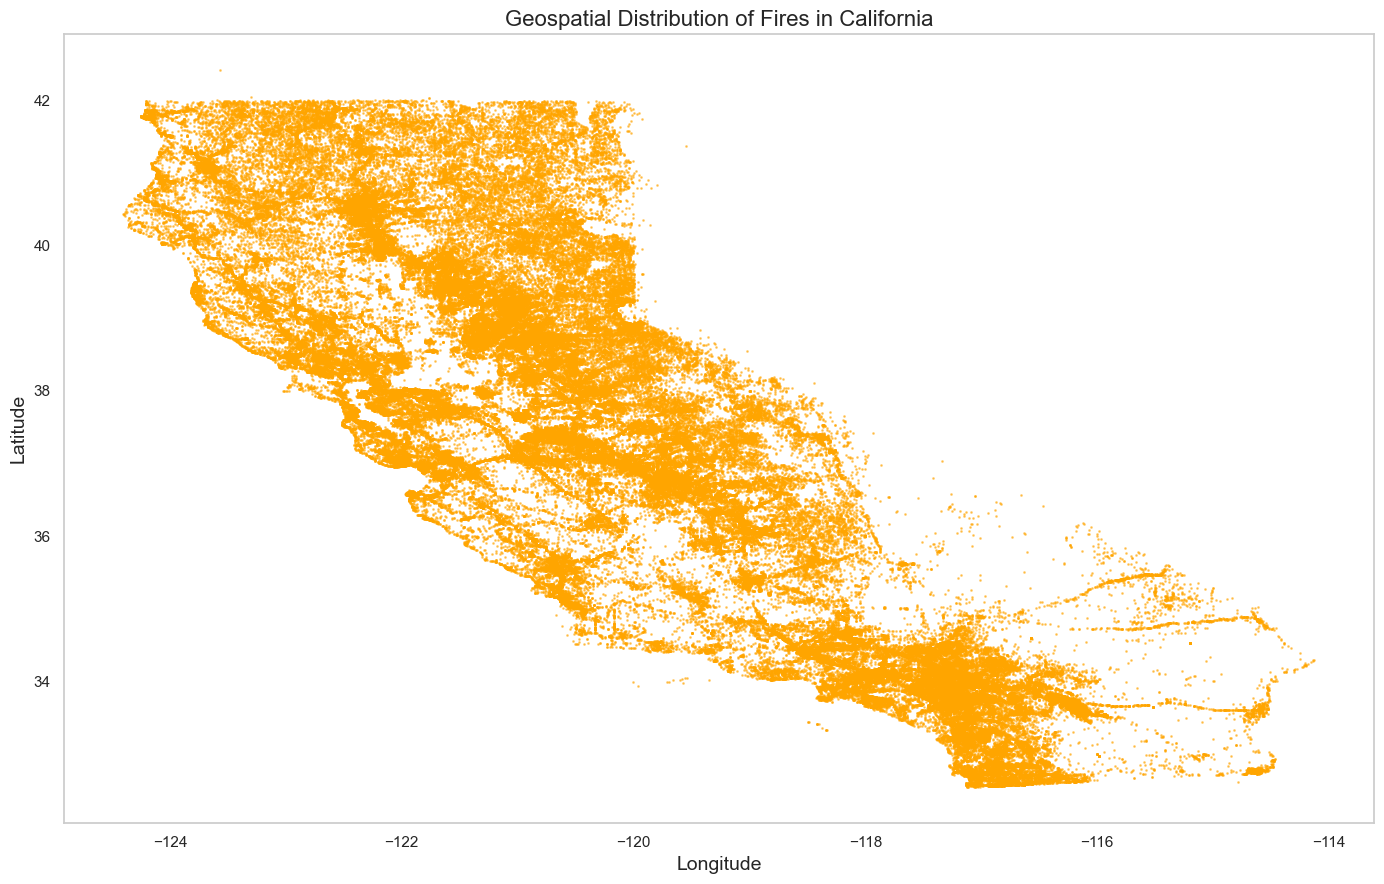

In [109]:
# Geospatial Distribution of Fires
plt.figure(figsize=(14, 9))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='orange', s=1)
plt.title('Geospatial Distribution of Fires in California', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/3850038241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='Paired')


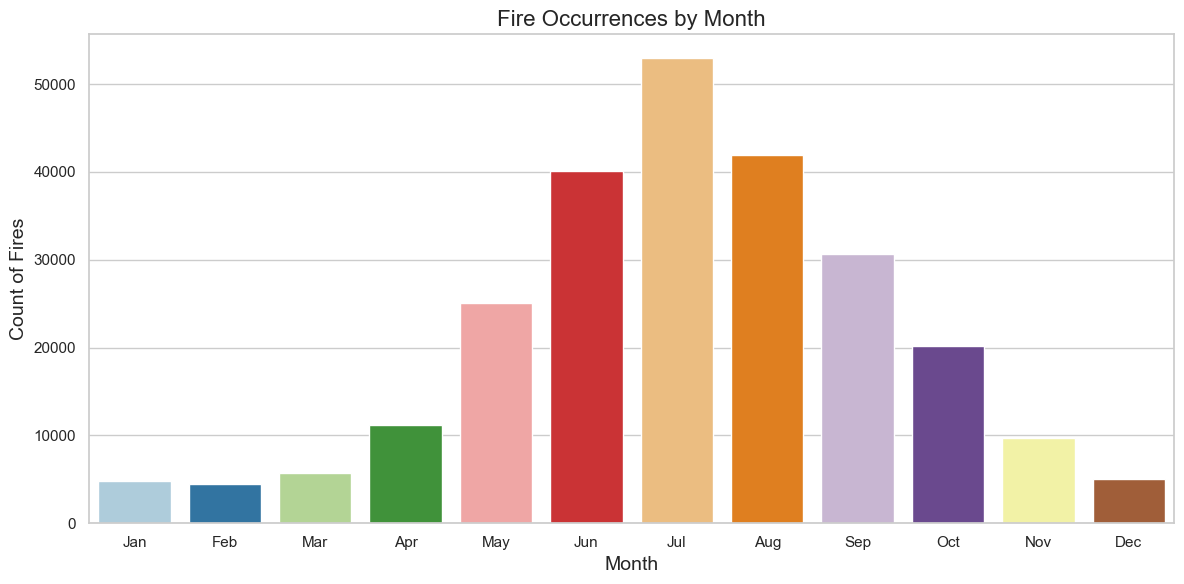

In [110]:
# Fire Occurences by Month 
df['Month'] = df['Discovery_Date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', palette='Paired')
plt.title('Fire Occurrences by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Fires', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

There appears to be an obvious 'fire season'

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_73634/630368131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fire_Year', y='Fire_Size_Acres', palette='Set2')


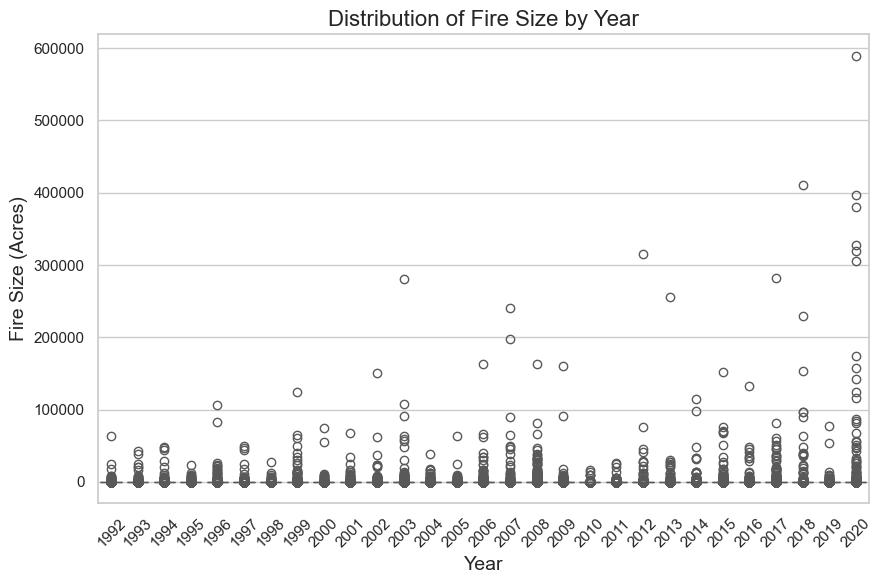

In [114]:
# Fire Size Distribution by Year
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='Fire_Year', y='Fire_Size_Acres', palette='Set2')
plt.title('Distribution of Fire Size by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fire Size (Acres)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Increase in number of larger fires...why? 

In [ ]:
### 

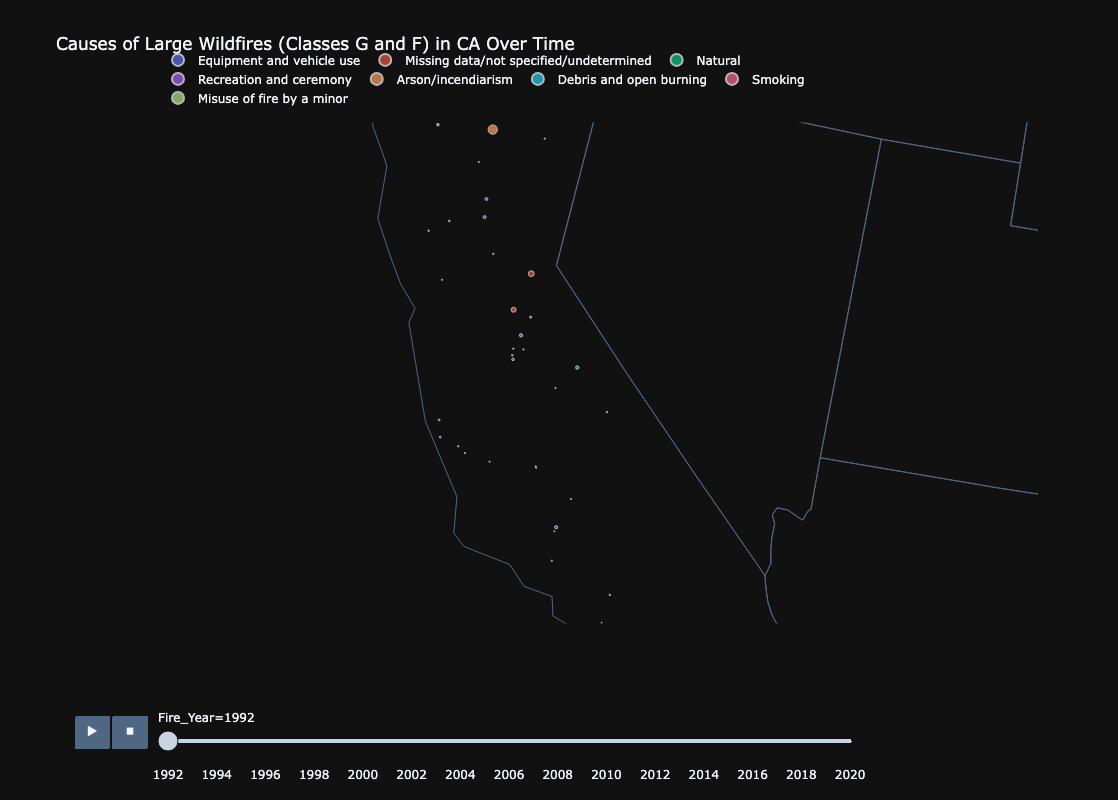

In [125]:
import plotly.express as px

ca_fires = df[((df['Fire_Size_Class'] == 'G') | (df['Fire_Size_Class'] == 'F'))].sort_values('Fire_Year')

# Create interactive map
interactive_map_ca = px.scatter_geo(
    ca_fires,
    lon='Longitude',  
    lat='Latitude', 
    size='Fire_Size_Acres',  # Size of the marker based on fire size
    color='General_Cause',  # Color based on cause of the fire
    hover_name='Fire_Size_Class',  # Hover data to display fire class (size)
    animation_frame='Fire_Year',  # animation over the years
    labels={'General_Cause': '', 'Fire_Year': 'Fire_Year'},  
    title='Causes of Large Wildfires (Classes G and F) in CA Over Time' 
)

# Update layout to make map look better
interactive_map_ca.update_layout(
    width=800,  
    height=800,  
    template="plotly_dark",  
    geo_scope='usa',  # Limit map to USA
    legend=dict(
        orientation="h",  
        yanchor="top",
        y=1.1,  # Position of the legend
        xanchor="left",
        x=0.1
    ),
    geo=dict(
        center=dict(lat=37.4, lon=-119.42),  # Center of the map around CA
        projection_scale=3.5  # Zoom level
    )
)

    
interactive_map_ca.show()